# Elementy Inteligencji Obliczeniowej - Sieci Neuronowe


---

**Prowadzący:** Jakub Bednarek<br>
**Kontakt:** jakub.bednarek@put.poznan.pl<br>
**Materiały:** [Strona WWW](http://jakub.bednarek.pracownik.put.poznan.pl)

---

## Uwaga

* **Aby wykonać polecenia należy najpierw przejść do trybu 'playground'. File -> Open in Playground Mode**
* Nowe funkcje Colab pozwalają na autouzupełnianie oraz czytanie dokumentacji

## Cel ćwiczeń: 

* wprowadzenie biblioteki TensorFlow,
* prezentacja podejścia Eager oraz Graph Execution,
* ukazanie różnic i podobieństw pomiędzy NumPy a TensorFlow,
* algorytm wstecznej propagacji błędu w TensorFlow

## Tensorflow

Tensorflow to biblioteka przeznaczona do uczenia maszynowego oraz przetwarzania Big Data. Jej podstawy zostały zbudowane na wzór NumPy, którego poszczególne elementy zostały zaprezentowane na poprzednich zajęciach.
Co wyróżnia Tensorflow to możliwość korzystania zarówno z CPU, GPU jak i łączenia jednostek obliczeniowych w klastry.

Korzystając z Colab nie potrzebujesz wykonywać żadnych dodatkowych kroków w celu konfiguracji.

Najnowszą wersją biblioteki jest TensorFlow 2.x. Aby ją aktywować wywołaj poniższe polecenie.


In [115]:
% tensorflow_version 2.x

UsageError: Line magic function `%` not found.


## Model działania biblioteki Tensorflow.

### Eager Execution

Tensorflow w wersji 2.x pozwala na prawie identyczne wykonanie operacji jak w przypadku biblioteki NumPy, poznanej na poprzednich zajęciach. Operacje wykonywane są w momencie ich wywołania. Podejście takie nazywa się **Eager Execution**.

Poniżej przedstawione zostało porównanie wykonania tego samego zadania w NumPy oraz w Tensorflow:

In [116]:
# import bibliotek
import tensorflow as tf
import numpy as np

import functools
def pipe(*fns):
  return functools.reduce(lambda f, g: lambda x: f(g(x)), reversed(fns))


In [117]:
# przykładowa alokacja danych:
np_arr = np.zeros([5, 5])
tf_arr = tf.zeros([5, 5])

np_arr = np.ones([5, 5])
tf_arr = tf.ones([5, 5])

np_arr = np.array([1, 2, 3, 4, 5])
tf_arr = tf.constant([1, 2, 3, 4, 5])

np_arr = np.random.normal(0, 1, [5, 5])
tf_arr = tf.random.normal([5, 5], 0, 1)

print('NumPy array:\n', np_arr, '\n')
print('Tensorflow array:\n', tf_arr, '\n')

NumPy array:
 [[-0.77477354 -1.18839116  0.26172453 -1.15782151  0.65631896]
 [-2.24112128  0.386126    0.95042627  0.88762384 -0.3336086 ]
 [ 0.89268609  0.72079749  2.2972762   1.71382373  0.67960114]
 [-0.54185278  1.36159851 -1.81937038 -2.02930088 -0.30077939]
 [ 0.98415681  1.09333523  0.16038999  2.48929194  1.24784078]] 

Tensorflow array:
 tf.Tensor(
[[ 0.11212981  0.8670607  -0.8283735   0.5101478  -1.2004864 ]
 [ 0.5234669  -1.214163   -1.0239543  -0.4095408   1.78634   ]
 [ 0.45178494  0.70679224 -0.25092903 -0.6332084   0.11357596]
 [-2.1938848  -0.57754683  0.18143164  0.29168558  1.2280666 ]
 [ 0.43795535 -1.1816193   1.1432407  -0.19620353  0.44696078]], shape=(5, 5), dtype=float32) 



### Zadanie 1

Zaalokuj tablicę samych zer o wymiarze 2 x 2. Następnie utwórz tablicę jedynek o tym samym wymiarze (wykorzystaj funkcję ones_like).

In [118]:
# alokacja zer
z = tf.zeros((2, 2))

# alokacja jedynek
o = tf.ones_like(z)

print(z)
print(o)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


Również operacje na danych wyglądają podobnie w Tensorflow:

In [119]:
a = tf.constant([1, 2, 3], dtype=tf.float32)
b = tf.constant([5, 2, 3], dtype=tf.float32)

c = a + b
d = a * b
e = a ** 2 + b ** 3
f = tf.sqrt(e)

print(f)

tf.Tensor([11.224972   3.4641016  6.       ], shape=(3,), dtype=float32)


### Zmienne w TensorFlow

Tensorflow posiada specjalny rodzaj obiektów, które reprezentują **zmienne uczone**. Poniżej zostało zaprezentowane wykorzystanie zmiennych uczonych.

Każda operacja w TensorFlow tworzy na wyjściu **tensor**, przez który można automatycznie propagować błąd. 

In [120]:
# zmienne uczone dla pojedynczej warstwy neuronowej (5 neuronów)
w = tf.Variable(tf.random.uniform([128, 5]))
b = tf.Variable(tf.random.uniform([5]))

# definicja warstwy w pełni połączonej
def neuron_layer(x):
  return x @ w + b

# losowy wektor wejściowy i inferencja (odpytanie) sieci neuronowej
x = tf.random.uniform([1, 128])
y = neuron_layer(x)

print(y)

tf.Tensor([[35.014496 34.582333 36.211212 34.224316 35.15509 ]], shape=(1, 5), dtype=float32)


Zmienne w TensorFlow można dowolnie modyfikować operacją *assign* (oraz jej pochodnymi wersjami).

**Uwaga:** Zmienne oraz wszelkie tensory w TensorFlow można przekształcić do tablicy Numpy wywołując funkcję *.numpy()*.

In [121]:
# inicjalizacja zmiennej z losowymi wartościami
b = tf.Variable(tf.random.uniform([5]))

print(b.numpy())

# wykonanie operacji dodawania na zmiennej
b.assign_add([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji odejmowania na zmiennej
b.assign_sub([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji przypisania na zmiennej
b.assign([1, 2, 3, 4, 5])

print(b.numpy())

[0.85214543 0.3817674  0.9092159  0.52043223 0.9349116 ]
[1.8521454 0.3817674 0.9092159 1.5204322 0.9349116]
[0.85214543 0.3817674  0.9092159  0.52043223 0.9349116 ]
[1. 2. 3. 4. 5.]


### Funkcje aktywacji i straty w TensorFlow

TensorFlow jest biblioteką przygotowaną do **Machine Learningu**. Wiele operacji bardzo często się powtarza w wielu zagadnieniach, np. funkcje aktywacji, funkcje straty, metryki, rodzaje warstw (operacji), itp. Stąd, w bilbiotece tej możemy znaleźć już gotowe komponenty, które można z łatwością wykorzystać.

Poniżej zaprezentowane zostały gotowe funkcje aktywacji oraz straty.

In [122]:
a = tf.random.uniform([5], -1, 1)

a_relu = tf.nn.relu(a)
a_sigmoid = tf.nn.sigmoid(a)
a_softmax = tf.nn.softmax(a, -1)
a_tanh = tf.nn.tanh(a)

# max(x, 0)
print('Relu:', a_relu.numpy())
# wyjście w przedziale (0, 1)
print('Sigmoid:', a_sigmoid.numpy())
# wyjście w przedziale (0, 1) a suma jest równa 1
print('Softmax:', a_softmax.numpy())
print('Tangens hiperboliczny:', a_tanh.numpy(), '\n')

# batch o wielkości 2
y = tf.random.uniform([2, 5], 0, 1)
y_hat = tf.random.uniform([2, 5], 0, 1)

# dla każdego elementu w batch'u błąd jest wyliczony osobno
y_mse = tf.losses.mean_squared_error(y_hat, y)
y_mae = tf.losses.mean_absolute_error(y_hat, y)
# from_logits oznacza, że funkcja aktywacji (softmax) będzie wywołana wewnątrz funkcji straty, a więc wyjście z sieci powinno być liniowe
y_ce = tf.losses.categorical_crossentropy(y_hat, y, from_logits=True)

print('MSE:', y_mse)
print('MAE:', y_mae)
print('CE:', y_ce)


Relu: [0.05959582 0.         0.         0.4173422  0.49763513]
Sigmoid: [0.5148945  0.49224922 0.33223113 0.60284704 0.6219034 ]
Softmax: [0.18650138 0.17034695 0.08742066 0.26671615 0.28901482]
Tangens hiperboliczny: [ 0.05952536 -0.03099569 -0.6031676   0.394689    0.46025527] 

MSE: tf.Tensor([0.380478   0.12720932], shape=(2,), dtype=float32)
MAE: tf.Tensor([0.5848356  0.32450283], shape=(2,), dtype=float32)
CE: tf.Tensor([4.4288645 5.1394033], shape=(2,), dtype=float32)


### Graph Execution

Na potrzeby optymalizacji Google wprowadziło (przywróciło) możliwość definiowania grafów przetwarzania. Przetwarzanie grafowe polega na przekształceniu ciągu operacji do grafu, który następnie jest optymalizowany (np. poprzez zastąpienie instrukcji 'for' przez 'tf.while_loop').

Aby zoptymalizować działanie kodu należy umieścić dane operacje w definicji funkcji opatrzonej w adnotację  @tf.function.

**Uwaga**
Po przekształceniu na graf tracimy możliwość łatwego debugowania kodu. Operacje przekształcane są do niskopoziomowej reprezentacji TensorFlow, znanej z wersji 1.x.

In [123]:
import time

# funkcja pomocnicza do mierzenia czasu wykonania funkcji

def speed_test(iters, func, *arg):
  start = time.perf_counter()
  for i in range(iters):
    func(*arg)
  end = time.perf_counter()
  return f"{end - start:.4f}sec"

In [124]:
# część wspólna operacji wywołanych w graph i eager execution
def eager_op(inputs):
  x = inputs ** 2
  z = tf.transpose(tf.ones_like(x))

  for i in range(100):
    # @ oznacza operację matmul
    x = inputs @ x

  # ile razy wywoła się ta linia w graph a ile w eager execution i dlaczego? 
  print('Ops function executed')

  return x

# graph execution wykonuje dokładnie te same operacje
@tf.function
def graph_op(inputs):
  return eager_op(inputs)

In [125]:
a = tf.random.uniform([1024, 1024], 0, 1)

print('------------ Eager Execution -----------')
print(speed_test(10, eager_op, a), 'sec')

print('------------ Graph Execution -----------')
print(speed_test(10, graph_op, a), 'sec')

------------ Eager Execution -----------
Ops function executed
Ops function executed
Ops function executed
Ops function executed
Ops function executed
Ops function executed
Ops function executed
Ops function executed
Ops function executed
Ops function executed
6.3759sec sec
------------ Graph Execution -----------
Ops function executed
5.3819sec sec


## Algorytm wstecznej propagacji błędu

Do wyprowadzenia wzorów na aktualizację zmiennych w algorytmie niezbędna jest znajomość zagadnień **chain-rule** oraz **multivariable chain-rule**. Poza podstawową wiedzą z matematyki są to jedyne niezbędne zagadnienia.

### Chain-rule & Multivariable Chain-rule

Poniżej zostały zaprezentowane zagadnienia **chain-rule** oraz **multivariable chain-rule** w sposób intuicyjny (i graficzny). Poniższa notacja została zaczerpnięta z sieci neuronowych, aby skojarzyć związek z algorytmem **backpropagation**.

#### Chain-rule

Jest to reguła opierająca się na pochodnej funkcji złożonej. W graficzny sposób można to pokazać następująco:

![chain-rule](https://drive.google.com/uc?id=1S8pSUrrOzoisKr8d8YJaQHNLYgEq2dpk)

Gdzie $L$ to pewna funkcja dla której liczymy pochodną względem zmiennej $w$. Jak widać, $L$ zależy od $y$, który zależy od $z$ który dopiero zależy bezpośrednio od $w$. Zależności tworzą łańcuch, skąd pochodzi nazwa **chain-rule**.

#### Multivariable Chain-rule

W przypadku gdy "łańcuch" w pewnym momencie się rozgałęzia, dalej możemy korzystać z zasady **chain-rule**, jednak tym razem przybiera ona formę nieco inną (lecz dalej intuicyjną):

![multivariable-chain-rule](https://drive.google.com/uc?id=13WH6JXd_5rnTkyToKrBcCZDPdUXCqoT8)

W tym przypadku, pochodna funkcji $L$ po zmiennej $z$ wyrażona jest jako suma pochodnych funkcji złożonych odpowiednio $y_1$ oraz $y_2$.

<!-- \\ %ib: chyba nie jest to tak dobry przykład, jak myślałem...

##### **Przykład:**
Załóżmy, że mamy funkcję $f(x) = x\cdot ln(x)$. Możemy ją przedstawić jako $f(x) = g(x)\cdot h(x)$, gdzie $g(x)=x$ i $h(x)=ln(x)$. Korzystając z multivariable chain-rule możemy wyprowadzić:

$$\frac{\partial f(x)}{\partial x} = \frac{\partial g(x)h(x)}{\partial x} = \frac{\partial g(x)h(x)}{\partial g(x)} \frac{\partial g(x)}{\partial x} + \frac{\partial g(x)h(x)}{\partial h(x)} \frac{\partial h(x)}{\partial x} = h(x)\cdot 1 + g(x)\cdot \frac{1}{x} = ln(x) + 1$$

Zwróć uwagę, że wzór na pochodną iloczynu jest szczególnym przypadkiem multivariable chain-rule:
$$(g(x)h(x))' = g'(x)h(x) + g(x)h'(x) = 1\cdot ln(x) + x\cdot\frac{1}{x} = ln(x) + 1$$ -->

\\

### Backpropagation

Algorytm **wstecznej propagacji błędu** jest właściwie jedynie rozwinięciem **reguły delta**, która została przedstawiona na pierwszych zajęciach. Podobnie jak poprzednio, uczenie neuronów opisane jest w następujący sposób:

$$w_i' = w_i - \mu \frac{\partial L}{\partial w_i} $$

Jedyną różnicą jest sposób w jaki się wylicza gradient. Nawiązując do powyższych, krótkich wyjaśnień **chain-rule**, w podobny sposób należy traktować sieci neuronowe. 

**Dla warstwy wyjściowej** gradient można przedstawić następująco:

$$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial w_{ji}} = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial z_j}\frac{\partial z_j}{\partial w_{ji}}$$

Albo inaczej:

$$\frac{\partial L}{\partial w_{ij}} = \delta_j o_i$$

Gdzie $w_{ji}$ oznacza wagę połączenia pomiędzy neuronem $j$ a $i$, $\delta_j = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial z_j}$ oraz $o_i$ to wyjście z neuronu $i$ (dla neuronów w pierwszej warstwie będą to wejścia do sieci, natomiast w kolejnych warstwach będą to wyjścia z neuronów poprzednich).

**Dla warstwy ukrytej** sprawa nieco bardziej się komplikuje. Weźmy jako przykład następującą prostą sieć z 2 warstwami i łącznie 3 neuronami:

![simplenet](https://drive.google.com/uc?id=1NXHjEWUX3gAbn8NnHh9eGWdQaSNDavKW)

Dla warstwy wyjściowej możemy skorzystać jedynie z **chain-rule** uzyskując następujące równanie:

$$\frac{\partial L}{\partial w^{2}_{i}} = \frac{\partial L}{\partial y^{2}_i} \frac{\partial y^{2}_i}{\partial z^{2}_i}\frac{\partial z^{2}_i}{\partial w^{2}_{i}} = \delta^2_i y^1_1$$

Przy obliczaniu gradientu dla warstwy ukrytej najpierw stosujemy  proste **chain-rule**:

$$\frac{\partial L}{\partial w^{1}_{1}} = \frac{\partial L}{\partial y^{1}_1} \frac{\partial y^{1}_1}{\partial z^{1}_1}\frac{\partial z^{1}_1}{\partial w^{1}_{1}}$$

W tym momencie można zauważyć, że jest możliwe zastosowanie **multivariable chain-rule** do wyrażenia $\frac{\partial L}{\partial y^{1}_1}$ (ponieważ $L$ nie zależy bezpośrednio od $y^{1}_1$, oraz występuje "rozgałęzienie" od $y$):

$$\frac{\partial L}{\partial y^{1}_1} = \frac{\partial L}{\partial y^{2}_1} \frac{\partial y^{2}_1}{\partial y^{1}_1} + \frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial y^{1}_1} = \frac{\partial L}{\partial y^{2}_1} \frac{\partial y^{2}_1}{\partial z^{2}_1}\frac{\partial z^{2}_1}{\partial y^{1}_1} + \frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial z^{2}_2} \frac{\partial z^{2}_2}{\partial y^{1}_1}$$

Tu można zauważyć, że $\frac{\partial z^{2}_2}{\partial y^{1}_1} = w^2_2$ oraz $\frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial z^{2}_2} = \delta^2_2$ (przy założeniu liniowej funkcji aktywacji), co daje nam końcowo:

$$\frac{\partial L}{\partial y^{1}_1} = \sum_i^2 \delta^2_i w^2_i$$

Podstawiając do wcześniejszego wzoru otrzymujemy:

$$\frac{\partial L}{\partial w^{1}_{1}} = \sum_i^2 \delta^2_i w^2_i \frac{\partial y^{1}_1}{\partial z^{1}_1}\frac{\partial z^{1}_1}{\partial w^{1}_{1}}$$

Ostatecznie, za pomocą następujących podstawień możemy sprowadzić powyższe równanie do wersji spójnej z gradientem dla warstwy wyjściowej:

$$\sum_i^2 \delta^2_i w^2_i \frac{\partial y^{1}_1}{\partial z^{1}_1} = \delta^1_1$$
$$\frac{\partial z^{1}_1}{\partial w^{1}_{1}} = x$$
$$\frac{\partial L}{\partial w^{1}_{1}} = \delta^1_1 x$$



---

Podsumowując, zarówno dla warstwy wyjściowej jak i warstwy ukrytej gradienty możemy przedstawić w tej samej formie, składającej się z **błędu neuronu** ($\delta$), oraz wyjścia z poprzedniej warstwy ($y$ lub $x$).

$$\frac{\partial L}{\partial w^{i}_{j}} = \delta^i_j o^{(i-1)}$$

### Automatyczna wsteczna propagacja błędu

Można rozpatrywać różne algorytmy optymalizacji działające na bazie algorytmu wstecznej propagacji błędu, który sam w sobie jest po prostu pewną strategią przydziału informacji o błędzie do zmiennych, a to jak na tej podstawie będziemy je modyfikować pozostaje otwartą kwestią. Jednym z prostszych optymalizatorów jest **Stochastic Gradient Descent** (SGD). Różni się od klasycznego Gradient Descent tym, że w jego przypadku gradient liczony jest w każdej iteracji dla losowo wybranego podzbioru danych uczących zamiast dla wszystkich. Innym popularnym optymalizatorem jest **ADAM** (od "adaptive moment estimation"), który każdą zmienną modyfikuje na podstawie jej statystycznych momentów (rzędu 1 i 2) gradientu w pewnym oknie czasowym. Ogólnie konstruowanie optymalizatorów opartych na gradiencie to cała osobna obszerna dziedzina naukowa. Przykładowo, na niektórych problemach ADAM ma znacznie szybszą zbieżność niż SGD, ale na innych zauważalnie gorzej radzi sobie z uogólnieniem wiedzy i w efekcie błąd na zbiorze testowym jest większy.

Poniżej zaprezentowany został algorytm wstecznej propagacji błędu zaimplementowany w bibliotece TensorFlow. Przykład składa się z definicji sieci neuronowej, funkcji straty oraz jednego kroku uczenia przy użyciu gotowego optymalizatora.

### Prosta sieć neuronowa

In [126]:
# zmienne uczone pojedynczego neuronu, który na wejście otrzymuje wektor 10 liczb.
w = tf.Variable(tf.ones([10, 1]))
b = tf.Variable(tf.ones([1]))

# definicja 1-warstwowej sieci neuronowej z funkcją aktywacji relu
# (@ jest aliasem do tf.matmul())
def network(x):
  return tf.nn.relu(x @ w + b)

### Funkcja straty

W poniższym kodzie tf.reduce_mean to odpowiednik np.mean i działa tak samo. Jako drugi argument można podać wymiar, po którym liczona będzie średnia (domyślnie liczona jest z wszystkich wymiarów). Jeżeli chodzi o *reduce* (nazywane również *fold*) w nazwie, to jest to schemat obliczeń często wykorzystywany w paradygmacie programowania funkcyjnego, i polega na rekurencyjnym przechodzeniu przez strukturę przy jednoczesnym konstruowaniu nowej, w pewnym sensie redukując tę strukturę (np. macierz liczb) do nowej struktury (np. liczby).

In [127]:
# mean squared error jako funkcja straty
def loss(y_pred, y_true):
  return tf.reduce_mean((y_pred - y_true) ** 2)

### Obliczenie gradientu

In [128]:
# wsteczna propagacja błędu obsługiwana jest przez optymalizatory dostępne w bibliotece TensorFlow; tutaj użyliśmy Adam'a.
optimizer = tf.optimizers.Adam(0.001)
#optimizer = tf.optimizers.SGD(0.001)  # a tutaj Stochastic Gradient Descent

# wejście oraz pożądane wyjście z sieci neuronowej
x = tf.random.uniform([32, 10])
y_true = tf.ones([32, 1])

# obiekt gradient tape pozwala na "nagrywanie" pochodnych operacji wykonanych wewnątrz struktury "with ... :"
with tf.GradientTape() as tape:
  y_pred = network(x)
  error = loss(y_pred, y_true)

# pobranie interesujących nas gradientów (tylko dla uczonych zmiennych!)
grads = tape.gradient(error, [w, b])
# oraz ich użycie przez optymalizator
optimizer.apply_gradients(zip(grads, [w, b]))

print(grads)

[<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[4.798718 ],
       [5.954609 ],
       [5.5307503],
       [4.8848777],
       [5.9512835],
       [5.327545 ],
       [5.065139 ],
       [5.673643 ],
       [5.575861 ],
       [6.4184666]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([10.366653], dtype=float32)>]


#### Zadanie 2

Korzystając z wiedzy z tych i poprzednich zajęć stwórz sieć neuronową składającą się z 3 warstw o rozmiarach odpowiednio 1, 2, 1. Niech w pierwszej i drugiej warstwie funkcją aktywacji będzie sigmoid a wyjście z sieci funkcją liniową. Skorzystaj z funkcji straty MSE.

Naucz sieć neuronową, aby wykonywała funkcję **sinus** (wejściem sieci niech będzie kąt wyrażony w radianach). Trening sieci powinien polegać na wykonaniu algorytmu wstecznej propagacji błędu **ITERS** razy. Każda iteracja niech przetwarza **batch** danych o rozmiarze 16. Do nauki sieci wykorzystaj algorytm **Stochastic Gradient Descent** (tf.optimizers.SGD).

W celu optymalizacji szybkości działania, dodaj do definicji modelu adnotację @tf.function.

Przy domyślnych parametrach wyjdzie zasadniczo linia prosta na zerze. Poeksperymentuj z prędkością uczenia i liczbą iteracji, by poprawić ten rezultat. Sprawdź, jak działa ReLU dla tego problemu. Dla sigmoidalnej funkcji aktywacji rezultat powinien przypominać następujący wykres:
![alt text](https://www.cs.put.poznan.pl/ibladek/students/eio/img/expected_sine.png)


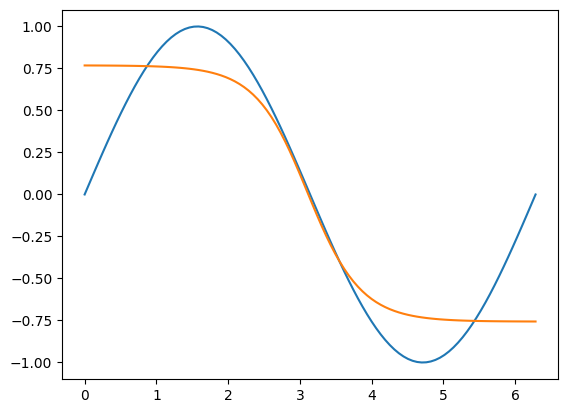

In [137]:
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# pierwsza warstwa
w1 = tf.Variable(tf.ones([1, 1]))
b1 = tf.Variable(tf.ones([1]))

# druga warstwa
w2 = tf.Variable(tf.ones([1, 2]))
b2 = tf.Variable(tf.ones([2]))

# trzecia warstwa
w3 = tf.Variable(tf.ones([2, 1]))
b3 = tf.Variable(tf.ones([1]))

loss = tf.losses.mse
from pipe import Pipe

def layer_1(x):
  return x @ w1 + b1

def layer_2(x):
  return x @ w2 + b2

def layer_3(x):
  return x @ w3 + b3

network = pipe(layer_1, tf.nn.sigmoid, layer_2, tf.nn.sigmoid, layer_3)

iters = 5_000
mu = 0.01  # prędkość uczenia
variables = [w1, b1, w2, b2, w3, b3]
optimizer = tf.optimizers.SGD(mu)

# Backpropagation
for _ in range(iters):
  # dane wejściowe
  x = tf.random.uniform([16, 1], 0, math.pi * 2)
  # dane uczące (ground truth)
  y_true = tf.math.sin(x)

  with tf.GradientTape() as tape:
    y_pred = network(x)
    error = tf.losses.mse(y_true, y_pred)

  gradients = tape.gradient(error, variables)
  optimizer.apply_gradients(zip(gradients, variables))

# testowanie sieci na zbiorze testowym
# wymiary są zmieniane by xs zostało zaakceptowane jako wejście do sieci
xs = np.linspace(0, 2 * math.pi, 100, dtype=np.float32).reshape([100, 1])
ys1 = np.sin(xs)
ys2 = network(xs)
plt.plot(xs, ys1, xs, ys2)
plt.show()

#### Zadanie 3

Wykonaj ponownie zadanie 2, tym razem samodzielnie implementując algorytm backpropagation.

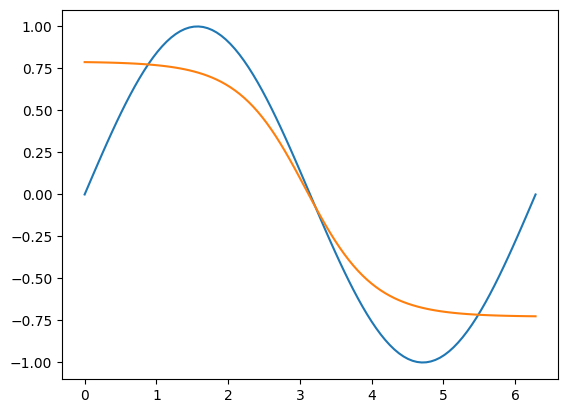

In [138]:
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# pierwsza warstwa
w1 = tf.Variable(tf.ones([1, 1]))
b1 = tf.Variable(tf.ones([1]))

# druga warstwa
w2 = tf.Variable(tf.ones([1, 2]))
b2 = tf.Variable(tf.ones([2]))

# trzecia warstwa
w3 = tf.Variable(tf.ones([2, 1]))
b3 = tf.Variable(tf.ones([1]))

def layer_1(x):
  return x @ w1 + b1

def layer_2(x):
  return x @ w2 + b2

def layer_3(x):
  return x @ w3 + b3

network = pipe(layer_1, tf.nn.sigmoid, layer_2, tf.nn.sigmoid, layer_3)

def d_sigmoid(z):
  sigma = tf.sigmoid(z)
  return sigma*(1 - sigma)

iters = 5_000
mu = 0.1
for i in range(iters):
  x = tf.random.uniform([16, 1], 0, math.pi * 2)
  y_true = tf.math.sin(x)

  # forwardfeed
  z1 = layer_1(x)
  y1 = tf.sigmoid(z1)

  z2 = layer_2(y1)
  y2 = tf.sigmoid(z2)

  z3 = layer_3(y2)
  y3 = z3
  y_pred = y3

  # backpropagation
  d3 = 2*(y_pred - y_true)
  dw3 = tf.expand_dims(tf.reduce_mean(d3*y2, axis=0), axis=1)
  db3 = tf.reduce_mean(d3, axis=0)

  d2 = (d3 @ tf.transpose(w3)) * d_sigmoid(z2)
  dw2 = tf.reduce_mean(d2*y1, axis=0)
  db2 = tf.reduce_mean(d2, axis=0)

  d1 = (d2 @ tf.transpose(w2)) * d_sigmoid(z1)
  dw1 = tf.reduce_mean(d1*x, axis=0)
  db1 = tf.reduce_mean(d1, axis=0)

  # update
  w3 = w3 - mu*dw3
  w2 = w2 - mu*dw2
  w1 = w1 - mu*dw1
  b3 = b3 - mu*db3
  b2 = b2 - mu*db2
  b1 = b1 - mu*db1

# testowanie sieci na zbiorze testowym
# wymiary są zmieniane by xs zostało zaakceptowane jako wejście do sieci
xs = np.linspace(0, 2 * math.pi, 100, dtype=np.float32).reshape([100, 1])
ys1 = np.sin(xs)
ys2 = network(xs)
plt.plot(xs, ys1, xs, ys2)
plt.show()